In [2]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

(array([ 3.,  4.,  4.,  7.,  6., 17.,  7.,  0.,  1.,  1.]),
 array([ 3.        ,  4.5999999 ,  6.19999981,  7.80000019,  9.39999962,
        11.        , 12.60000038, 14.19999981, 15.80000019, 17.40000153,
        19.        ]),
 <BarContainer object of 10 artists>)

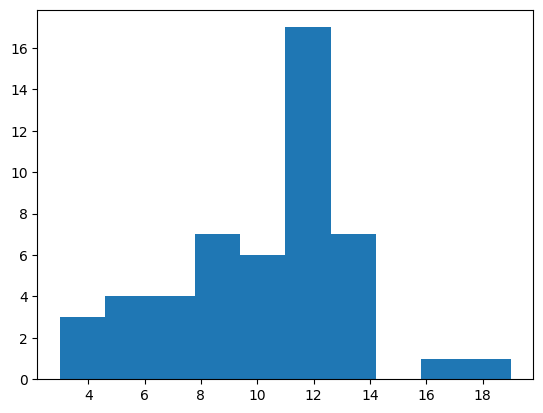

In [3]:
# make λ a float tensor
rate = torch.tensor([10.0], dtype=torch.float32)  # or just torch.tensor([10.])
m = dist.Poisson(rate)

samples = m.sample((50,))        # 50 i.i.d. Poisson draws
samples             # torch.float32 (same dtype as rate)

plt.hist(samples,bins=10)

In [4]:
x = torch.arange(5)  # shape [5]
lmbda = torch.arange(5, dtype=torch.float32)  # shape [5]

# Reshape for broadcasting
x_grid = x.view(1, -1)        # shape [1, 5]
lambda_grid = lmbda.view(-1, 1)  # shape [5, 1]

# Distribution over grid of lambdas
m = dist.Poisson(rate=lambda_grid)  # shape [5, 1]

# Broadcasted log-prob over all (λ_i, x_j)
log_probs = m.log_prob(x_grid)  # shape [5, 5]
probs = log_probs.exp()

print("Probs:\n", probs)

Probs:
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])


In [5]:
gamma_dist=dist.Gamma(2.0,1.5)

gamma_dist.log_prob(torch.tensor([1.5,3.,4.2]))

tensor([-1.0336, -2.5905, -4.0540])

(array([350., 135.,  70., 110., 129., 103.,  72.,  17.,   8.,   6.]),
 array([ 0.        ,  2.0999999 ,  4.19999981,  6.29999971,  8.39999962,
        10.5       , 12.59999943, 14.69999886, 16.79999924, 18.89999962,
        21.        ]),
 <BarContainer object of 10 artists>)

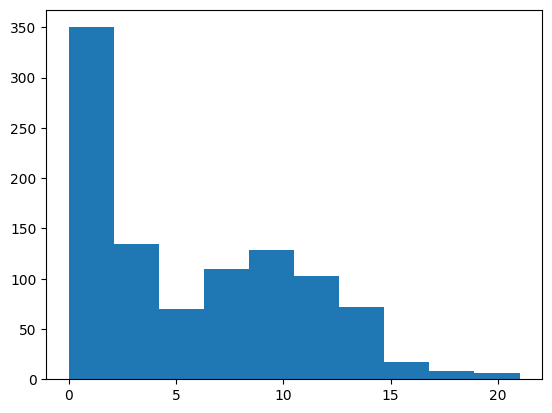

In [16]:
cat = dist.Categorical(torch.asarray([0.5, 0.5]))
z_t=cat.sample(sample_shape=(1000,))

rates=torch.tensor([10.0,2.0])
poisson=dist.Poisson(rate=rates[z_t])

poisson.sample().numpy()

plt.hist(poisson.sample().numpy())

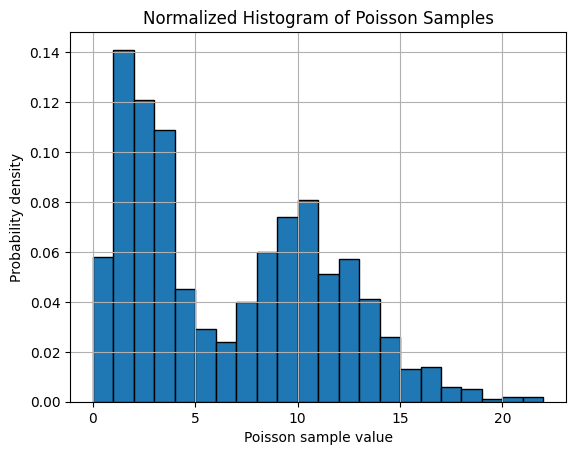

In [17]:
import torch
import matplotlib.pyplot as plt
from torch.distributions import Categorical, Poisson

# Step 1: Sample 1000 categories from a 2-class Categorical distribution
cat = Categorical(torch.tensor([0.5, 0.5]))
z_t = cat.sample(sample_shape=(1000,))

# Step 2: Assign Poisson rates based on the sampled category
rates = torch.tensor([10.0, 2.0])
selected_rates = rates[z_t]

# Step 3: Sample from the corresponding Poisson distributions
poisson = Poisson(rate=selected_rates)
samples = poisson.sample().numpy()

# Step 4: Plot normalized histogram
plt.hist(samples, bins=range(0, int(samples.max()) + 2), density=True, edgecolor='black')
plt.xlabel('Poisson sample value')
plt.ylabel('Probability density')
plt.title('Normalized Histogram of Poisson Samples')
plt.grid(True)
plt.show()
